In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler

# Original dataframe

In [45]:
data_path = 'C:\\Users\\vansh\\Documents\\PL\\IPL\\Capstone\\Breast Cancer Data.csv'
df = pd.read_csv(data_path)
df.head()

,id,diagnosis,diagnosis_numeric,radius,texture,perimeter,area,smoothness,compactness,concavity,...,radius_worse,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,8510426.0,B,0.0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,8510653.0,B,NaN,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,8510824.0,B,NaN,9.504,12.44,60.34,NaN,0.10240,0.06492,0.02956,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,854941.0,B,NaN,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,85713702.0,B,NaN,8.196,16.84,51.71,201.9,NaN,0.05943,0.01588,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [46]:
df.dtypes

id                         float64
diagnosis                   object
diagnosis_numeric          float64
radius                     float64
texture                    float64
perimeter                  float64
area                       float64
smoothness                 float64
compactness                float64
concavity                  float64
concave_points             float64
symmetry                   float64
fractal_dimension          float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worse               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst   

In [47]:
df.shape

(578, 33)

In [48]:
df.describe()

,id,diagnosis_numeric,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,...,radius_worse,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.780000e+02,543.000000,577.000000,576.000000,577.000000,573.000000,575.000000,577.000000,575.000000,578.000000,...,575.000000,577.000000,578.000000,578.000000,578.000000,577.000000,578.000000,577.000000,578.000000,578.000000
mean,2.123348e+09,0.523020,14.504840,19.599649,93.084350,1051.953481,0.096329,0.104133,176.766716,0.048919,...,16.267118,25.670616,107.261213,880.583128,0.132369,0.254104,0.272188,0.114497,0.290076,0.083946
std,5.032827e+10,4.326496,5.623859,6.151670,28.972429,4921.102332,0.013939,0.052213,4170.226831,0.038499,...,4.803561,6.101419,33.339447,564.899149,0.022654,0.156193,0.206991,0.065223,0.061383,0.017920
min,8.670000e+03,-10.000000,6.981000,0.100000,10.000000,10.000000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692195e+05,0.000000,11.710000,16.177500,75.210000,420.500000,0.086580,0.065450,0.029700,0.020413,...,13.040000,21.180000,84.367500,516.025000,0.116850,0.147800,0.116725,0.064990,0.250700,0.071827
50%,9.064145e+05,0.000000,13.430000,18.890000,86.600000,553.500000,0.096100,0.094620,0.063350,0.034190,...,14.990000,25.470000,97.980000,689.000000,0.131600,0.216400,0.230050,0.101500,0.282700,0.080195
75%,8.812869e+06,1.000000,16.020000,21.812500,104.300000,788.500000,0.105100,0.129900,0.135550,0.072710,...,18.550000,29.510000,124.975000,1048.500000,0.145900,0.333100,0.379550,0.160900,0.317475,0.091990
max,1.210000e+12,100.000000,80.000000,80.000000,300.000000,80000.000000,0.163400,0.345400,100000.000000,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Replace missing values

In [49]:
print(df.isnull().sum())

id                          0
diagnosis                   0
diagnosis_numeric          35
radius                      1
texture                     2
perimeter                   1
area                        5
smoothness                  3
compactness                 1
concavity                   3
concave_points              0
symmetry                    4
fractal_dimension           1
radius_se                   1
texture_se                  1
perimeter_se                0
area_se                     2
smoothness_se               2
compactness_se              2
concavity_se                1
concave_points_se           4
symmetry_se                 1
fractal_dimension_se        1
radius_worse                3
texture_worst               1
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           1
concavity_worst             0
concave_points_worst        1
symmetry_worst              0
fractal_dimension_worst     0
dtype: int

In [50]:
drop = df.drop('diagnosis', axis = 1)
all_vals = drop.apply(lambda x: x.fillna(x.mean()))
all_vals

,id,diagnosis_numeric,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,...,radius_worse,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,8510426.0,0.00000,13.54000,14.360000,87.46,566.300000,0.097790,0.08129,0.066640,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,8510653.0,0.52302,13.08000,15.710000,85.63,520.000000,0.107500,0.12700,0.045680,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,8510824.0,0.52302,9.50400,12.440000,60.34,1051.953481,0.102400,0.06492,0.029560,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,854941.0,0.52302,13.03000,18.420000,82.61,523.800000,0.089830,0.03766,0.025620,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,85713702.0,0.52302,8.19600,16.840000,51.71,201.900000,0.096329,0.05943,0.015880,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,926125.0,1.00000,20.92000,25.090000,143.00,1347.000000,0.109900,0.22360,176.766716,0.147400,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873
574,926424.0,1.00000,21.56000,22.390000,142.00,1479.000000,0.111000,0.11590,0.243900,0.138900,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
575,926682.0,1.00000,20.13000,28.250000,131.20,1261.000000,0.096329,0.10340,0.144000,0.097910,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
576,926954.0,1.00000,16.60000,19.599649,108.30,858.100000,0.084550,0.10230,0.092510,0.053020,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [51]:
print(all_vals.isnull().sum())

id                         0
diagnosis_numeric          0
radius                     0
texture                    0
perimeter                  0
area                       0
smoothness                 0
compactness                0
concavity                  0
concave_points             0
symmetry                   0
fractal_dimension          0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worse               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


# Pearsons corr

In [52]:
all_vals.corr()

,id,diagnosis_numeric,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,...,radius_worse,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.004730,0.263290,0.409961,-0.119466,0.416250,-0.000035,0.000003,-0.000025,0.000109,...,0.000204,0.000158,0.000197,0.000264,0.000025,-0.000007,0.000057,0.000088,-0.000109,-0.000074
diagnosis_numeric,0.004730,1.000000,0.021296,-0.000262,0.025739,0.007541,0.158154,0.080404,0.000085,0.056914,...,0.032185,-0.008690,0.033146,0.036809,0.137006,0.051457,0.034884,0.054433,0.093348,0.046612
radius,0.263290,0.021296,1.000000,0.467537,0.852416,0.444679,0.099838,0.309568,-0.003339,0.506791,...,0.599188,0.179502,0.596203,0.582466,0.071724,0.248954,0.321821,0.457261,0.098388,0.000195
texture,0.409961,-0.000262,0.467537,1.000000,0.372713,0.603906,-0.016012,0.163157,-0.019848,0.203223,...,0.243479,0.629600,0.246930,0.237173,0.055757,0.191783,0.208183,0.203251,0.075899,0.083743
perimeter,-0.119466,0.025739,0.852416,0.372713,1.000000,0.297186,0.167089,0.463809,-0.006523,0.707605,...,0.805143,0.250794,0.806542,0.782705,0.125483,0.378578,0.469756,0.639647,0.156639,0.043142
area,0.416250,0.007541,0.444679,0.603906,0.297186,1.000000,0.011639,0.021796,-0.001321,0.048535,...,0.057705,0.012119,0.056781,0.058340,0.004101,0.011912,0.023514,0.039549,0.019881,-0.010744
smoothness,-0.000035,0.158154,0.099838,-0.016012,0.167089,0.011639,1.000000,0.652719,-0.058259,0.547933,...,0.208118,0.033009,0.233313,0.203253,0.800192,0.466129,0.425073,0.499800,0.394418,0.493967
compactness,0.000003,0.080404,0.309568,0.163157,0.463809,0.021796,0.652719,1.000000,-0.034607,0.829906,...,0.535750,0.246464,0.590694,0.512202,0.566400,0.857876,0.807939,0.811536,0.512713,0.683512
concavity,-0.000025,0.000085,-0.003339,-0.019848,-0.006523,-0.001321,-0.058259,-0.034607,1.000000,-0.033993,...,-0.013519,-0.016833,-0.013584,-0.016085,-0.043024,-0.025509,-0.033448,-0.017983,-0.037660,-0.008513
concave_points,0.000109,0.056914,0.506791,0.203223,0.707605,0.048535,0.547933,0.829906,-0.033993,1.000000,...,0.829590,0.290653,0.855923,0.809630,0.452753,0.666029,0.752399,0.909629,0.375744,0.368661


In [53]:
all_vals['diagnosis_numeric'].corr(all_vals['radius'])

0.02129631892635544

In [54]:
threshold = 0.7
highly_corrcols = np.where(all_vals > threshold)
to_drop = []
for i in range(len(df.columns)):
    for j in range(i+1,len(df.columns)):
        if highly_corrcols[0][i] == highly_corrcols[1][j]:
            to_drop.append(df.columns[j])
new_df = df.drop(to_drop, axis = 1)
print(new_df)

             id diagnosis  diagnosis_numeric  radius  texture  perimeter  \
0     8510426.0         B                0.0  13.540    14.36      87.46   
1     8510653.0         B                NaN  13.080    15.71      85.63   
2     8510824.0         B                NaN   9.504    12.44      60.34   
3      854941.0         B                NaN  13.030    18.42      82.61   
4    85713702.0         B                NaN   8.196    16.84      51.71   
..          ...       ...                ...     ...      ...        ...   
573    926125.0         M                1.0  20.920    25.09     143.00   
574    926424.0         M                1.0  21.560    22.39     142.00   
575    926682.0         M                1.0  20.130    28.25     131.20   
576    926954.0         M                1.0  16.600      NaN     108.30   
577    927241.0         M                1.0     NaN    29.33     140.10   

       area  smoothness  compactness  concavity  ...  symmetry_se  \
0     566.3     0.

In [55]:
new_df.head()

,id,diagnosis,diagnosis_numeric,radius,texture,perimeter,area,smoothness,compactness,concavity,...,symmetry_se,fractal_dimension_se,radius_worse,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,8510426.0,B,0.0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,...,0.01980,0.002300,15.110,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,8510653.0,B,NaN,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,...,0.01678,0.002425,14.500,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,8510824.0,B,NaN,9.504,12.44,60.34,NaN,0.10240,0.06492,0.02956,...,0.02027,0.002968,10.230,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,854941.0,B,NaN,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,...,0.02671,0.001777,13.300,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,85713702.0,B,NaN,8.196,16.84,51.71,201.9,NaN,0.05943,0.01588,...,0.02574,0.002582,8.964,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


# (578, 33) - Original dataframe columns
# (578, 30) - After dropping highly correlated columns and 1 column in object datatype

In [56]:
new_df.shape

(578, 30)

# Box and Whiskers
- Switching the Y axis to logarithmic scale : plt.semilog y
- vert = False : vertical box plot
- https://towardsdatascience.com/creating-boxplots-of-well-log-data-using-matplotlib-in-python-34c3816e73f4

[]

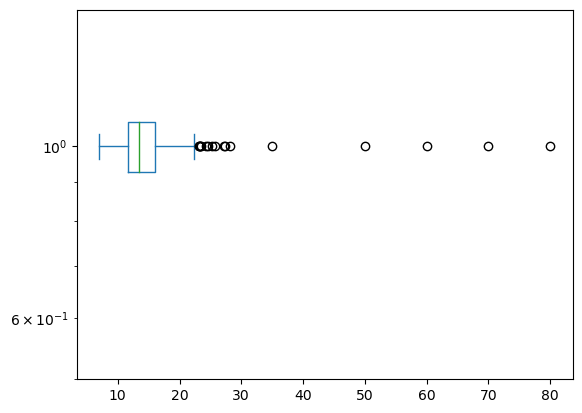

In [57]:
new_df['radius'].plot(kind='box',vert=False);
plt.semilogy()

# Formatting the outliers

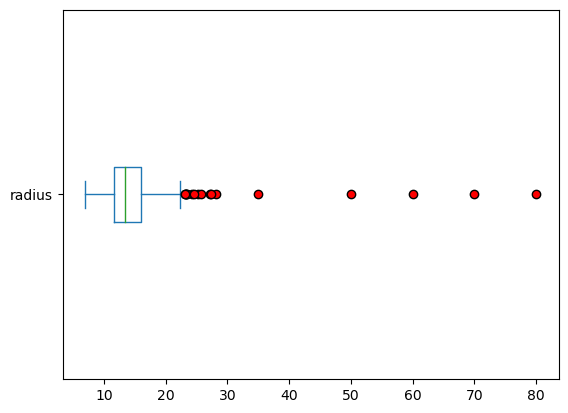

In [58]:
red_circle = dict(markerfacecolor='red', marker='o')
new_df['radius'].plot(kind='box',vert=False, flierprops = red_circle);

# Formatting outliers, finding median and mean

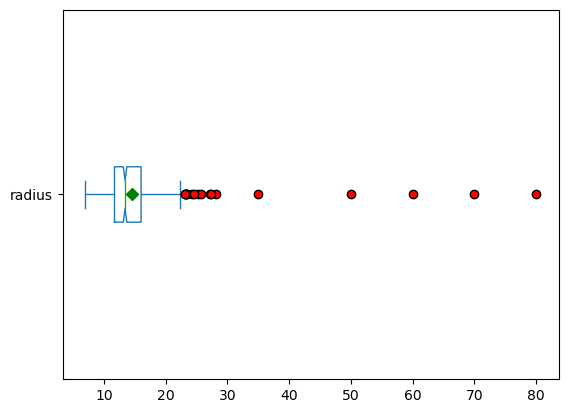

In [59]:
red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor = 'green')
new_df['radius'].plot(kind='box',vert=False, flierprops = red_circle, showmeans=True, meanprops = mean_shape, notch=True);

# All columns in box plot

alter_newdf.plot(kind = 'box', vert = False);
plt.semilogy()

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor = 'white')
fig, axs = plt.subplots(1, len(new_df.columns), figsize = (20,10))
for i, ax in enumerate(axs.flat):
    ax.boxplot(new_df.iloc[:,i], flierprops = red_circle)
    ax.set_title(new_df.columns[i], fontsize = 20, fontweight = 'bold')
    ax.tick_params(axis='y', labelsize = 14)
plt.tight_layout()

# Removing outliers

In [60]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_filtered = new_df[~((new_df < lower_bound) | (new_df > upper_bound)).any(axis=1)]
print(df_filtered)

            id diagnosis  diagnosis_numeric  radius  texture  perimeter  \
0    8510426.0         B                0.0  13.540    14.36      87.46   
1    8510653.0         B                NaN  13.080    15.71      85.63   
2    8510824.0         B                NaN   9.504    12.44      60.34   
3     854941.0         B                NaN  13.030    18.42      82.61   
5     857155.0         B                NaN  12.050    14.63      78.04   
..         ...       ...                ...     ...      ...        ...   
559   915460.0         M                1.0  15.460    23.95     103.80   
560   915691.0         M                1.0  13.400    20.52      88.64   
562   916799.0         M                1.0  18.310    20.58     120.80   
565   916838.0         M                1.0  19.890    20.26     130.50   
576   926954.0         M                1.0  16.600      NaN     108.30   

       area  smoothness  compactness  concavity  ...  symmetry_se  \
0     566.3     0.09779      0

C:\Users\vansh\AppData\Local\Temp\ipykernel_11408\457941032.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\vansh\AppData\Local\Temp\ipykernel_11408\457941032.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
C:\Users\vansh\AppData\Local\Temp\ipykernel_11408\457941032.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_filtered = new_df[~((new_df < lower_bound) | (new_df > upper_bound)).any(axis=1)]


# Before removing outliers, data shape: (578, 33)
# After removing outliers, data shape: (343, 30)

In [77]:
df_filtered.shape

(343, 30)

In [72]:
drop1 = df_filtered.drop('diagnosis', axis = 1)
drop1.head()

,id,diagnosis_numeric,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,...,symmetry_se,fractal_dimension_se,radius_worse,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,8510426.0,0.0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,...,0.01980,0.002300,15.11,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,8510653.0,NaN,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,...,0.01678,0.002425,14.50,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,8510824.0,NaN,9.504,12.44,60.34,NaN,0.10240,0.06492,0.02956,0.02076,...,0.02027,0.002968,10.23,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,854941.0,NaN,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,...,0.02671,0.001777,13.30,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
5,857155.0,NaN,12.050,14.63,78.04,449.3,0.10310,0.09092,0.06592,0.02749,...,0.01428,0.002422,13.76,582.6,0.14940,0.21560,0.30500,0.06548,0.2747,0.08301


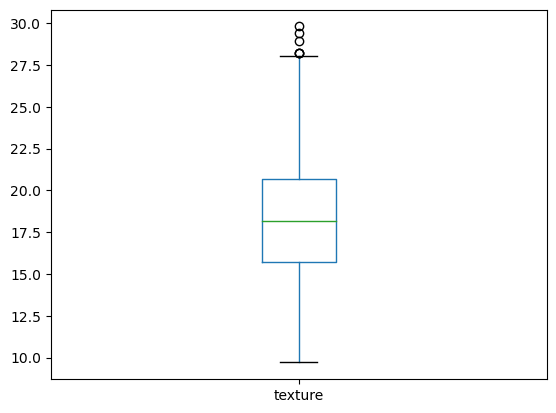

In [73]:
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
plot_boxplot(drop1, 'texture')

# Normalizing data

In [76]:
scaler = StandardScaler()
final_df = pd.DataFrame(scaler.fit_transform(drop1), columns=df.columns)
final_df

ValueError: Shape of passed values is (343, 29), indices imply (343, 33)

# Data Description - Mean, Mode, Std.Dev, Percentile

In [78]:
mean_values = drop1.mean()
mean_values

id                         2.467435e+06
diagnosis_numeric          2.303030e-01
radius                     1.333927e+01
texture                    1.844754e+01
perimeter                  8.615262e+01
area                       5.664309e+02
smoothness                 9.324499e-02
compactness                8.605061e-02
concavity                  5.964391e-02
concave_points             3.560792e-02
symmetry                   1.732754e-01
radius_se                  3.047836e-01
texture_se                 1.112547e+00
perimeter_se               2.137538e+00
area_se                    2.624478e+01
smoothness_se              6.496822e-03
compactness_se             1.978683e-02
concavity_se               2.404299e-02
concave_points_se          9.957833e-03
symmetry_se                1.882813e-02
fractal_dimension_se       3.046902e-03
radius_worse               1.501160e+01
area_worst                 7.222190e+02
smoothness_worst           1.286665e-01
compactness_worst          2.092623e-01


In [79]:
mode_values = drop1.mode()
mode_values

,id,diagnosis_numeric,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,...,symmetry_se,fractal_dimension_se,radius_worse,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,8670.0,0.0,12.18,14.93,67.49,334.2,0.1007,0.04994,0.0,0.0,...,0.01344,0.001892,13.34,458.0,0.1234,0.1486,0.0,0.0,0.2369,0.06469
1,8913.0,NaN,12.34,16.85,71.49,399.8,NaN,0.05794,NaN,NaN,...,NaN,0.001906,NaN,489.5,0.1312,NaN,NaN,NaN,0.2972,0.06783
2,8915.0,NaN,12.77,NaN,78.29,466.1,NaN,0.07698,NaN,NaN,...,NaN,0.001956,NaN,547.4,NaN,NaN,NaN,NaN,0.3109,0.06915
3,9047.0,NaN,13.85,NaN,78.83,477.3,NaN,0.08468,NaN,NaN,...,NaN,0.001971,NaN,708.8,NaN,NaN,NaN,NaN,NaN,0.07127
4,85715.0,NaN,15.46,NaN,79.19,506.3,NaN,0.09509,NaN,NaN,...,NaN,0.002701,NaN,725.9,NaN,NaN,NaN,NaN,NaN,0.07427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,9112712.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,9113156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,9113455.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
341,9113514.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
std_dev = drop1.std()
std_dev

id                         3.292907e+06
diagnosis_numeric          4.216661e-01
radius                     2.534328e+00
texture                    3.887804e+00
perimeter                  1.717177e+01
area                       2.242455e+02
smoothness                 1.212612e-02
compactness                3.454452e-02
concavity                  4.832166e-02
concave_points             2.545236e-02
symmetry                   2.012806e-02
radius_se                  1.274146e-01
texture_se                 4.229473e-01
perimeter_se               8.930322e-01
area_se                    1.557113e+01
smoothness_se              2.167531e-03
compactness_se             1.053103e-02
concavity_se               1.498391e-02
concave_points_se          4.180721e-03
symmetry_se                5.286951e-03
fractal_dimension_se       1.328759e-03
radius_worse               3.271818e+00
area_worst                 3.322079e+02
smoothness_worst           2.033417e-02
compactness_worst          1.040651e-01


In [81]:
quartiles = drop1.quantile([0.25, 0.5, 0.75])
quartiles

,id,diagnosis_numeric,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,...,symmetry_se,fractal_dimension_se,radius_worse,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0.25,866566.0,0.0,11.670,15.7150,74.665,418.325,0.08448,0.058905,0.025907,0.01862,...,0.01491,0.002045,12.90,512.8,0.1139,0.13685,0.10480,0.061292,0.24720,0.07026
0.50,901088.0,0.0,12.960,18.1500,83.190,515.200,0.09200,0.080280,0.045315,0.02837,...,0.01805,0.002754,14.35,628.5,0.1287,0.18810,0.18110,0.084805,0.27470,0.07809
0.75,922296.5,0.0,14.665,20.7075,94.880,660.450,0.10170,0.108850,0.081498,0.04827,...,0.02164,0.003733,16.45,830.5,0.1422,0.25715,0.29255,0.125100,0.30615,0.08734


# Creating a CSV file

In [82]:
drop1.to_csv('Cleandata_BC.csv', index=False)